In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
print(sys.path)

from DeepSolarEye.handling.split_data import train_test_val_split

['/Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks', '/Users/peterbitman/code/pemabi/04-Decision-Science/01-Project-Setup/data-context-and-setup', '/Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks', '/Users/peterbitman/.pyenv/versions/3.10.6/lib/python310.zip', '/Users/peterbitman/.pyenv/versions/3.10.6/lib/python3.10', '/Users/peterbitman/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload', '', '/Users/peterbitman/.pyenv/versions/3.10.6/envs/Deep_Solar_Eye/lib/python3.10/site-packages', '..']


In [22]:
train_test_val_split(train_ratio=0.01, test_ratio=0.08, val_ratio=0.1)

3it [00:10,  3.39s/it]

train size: 14641
test_size: 3660
val_size: 4575


In [23]:
import os
test = os.listdir('/Users/peterbitman/Desktop/Deep_Solar_Eye/raw_data/test_data')

In [24]:
len(test)

3660

In [25]:
from DeepSolarEye.handling.load_tensor import get_numerical_data, load_and_process_image, load_tensor

In [27]:
path_test = "test_data"
path_train = "train_data"
path_val = "val_data"

df_test = get_numerical_data(path_test)
df_train = get_numerical_data(path_train)
df_val = get_numerical_data(path_val)

In [28]:
train_ds, batch_size = load_tensor(df_train, 16, path_train)
test_ds, batch_size = load_tensor(df_test, 16, path_test)
val_ds, batch_size = load_tensor(df_val, 16, path_val)

In [29]:
print(type(train_ds))
print(type(test_ds))
print(type(val_ds))

<class 'tensorflow.python.data.ops.zip_op._ZipDataset'>
<class 'tensorflow.python.data.ops.zip_op._ZipDataset'>
<class 'tensorflow.python.data.ops.zip_op._ZipDataset'>


In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from DeepSolarEye.dl_logic.model import regression_ResNet

In [31]:
from tensorflow.keras.optimizers.legacy import Adam

initial_learning_rate = 0.01

optimizer = Adam(learning_rate=initial_learning_rate)

In [32]:
model = regression_ResNet(model_name='ResNet50', input_shape=(224, 224, 3),input_time_irradiance=(2,), num_units=512, pretrained=True)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [33]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4
                              )

history = model.fit(train_ds,
            epochs=500,
            batch_size=batch_size,
            validation_data=val_ds,
            callbacks=[early_stopping, reduce_lr],
           )

Epoch 1/500
916/916 [==============================] - 593s 646ms/step - loss: 0.2157 - mae: 0.3126 - val_loss: 0.0967 - val_mae: 0.2762 - lr: 0.0010
Epoch 2/500
916/916 [==============================] - 595s 650ms/step - loss: 0.0867 - mae: 0.2502 - val_loss: 0.0889 - val_mae: 0.2730 - lr: 0.0010
Epoch 3/500
916/916 [==============================] - 571s 624ms/step - loss: 0.0828 - mae: 0.2470 - val_loss: 0.0807 - val_mae: 0.2544 - lr: 0.0010
Epoch 4/500
916/916 [==============================] - 569s 622ms/step - loss: 0.0818 - mae: 0.2460 - val_loss: 0.0792 - val_mae: 0.2481 - lr: 0.0010
Epoch 5/500
916/916 [==============================] - 570s 623ms/step - loss: 0.0804 - mae: 0.2451 - val_loss: 0.0789 - val_mae: 0.2469 - lr: 0.0010
Epoch 6/500
916/916 [==============================] - 571s 623ms/step - loss: 0.0796 - mae: 0.2449 - val_loss: 0.0785 - val_mae: 0.2454 - lr: 0.0010
Epoch 7/500
916/916 [==============================] - 564s 616ms/step - loss: 0.0793 - mae: 0.2443 

2024-02-09 11:01:01.268843: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__30__6_2017_L_0.75896173795_I_0.340992156863.jpg; No such file or directory
2024-02-09 11:01:01.271851: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__32__33_2017_L_0.818904529796_I_0.488356862745.jpg; No such file or directory
2024-02-09 11:01:01.271904: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__30__26_2017_L_0.831362307542_I_0.503039215686.jpg; No such file or directory
2024-02-09 11:01:01.271932: W tensorflow/core/framework/op_kernel.cc:183

 88/916 [=>............................] - ETA: 14:25 - loss: 0.0720 - mae: 0.2315

2024-02-09 11:01:04.187601: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__36__10_2017_L_0.815042453885_I_0.543611764706.jpg; No such file or directory
2024-02-09 11:01:04.187828: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__37__1_2017_L_0.822612811049_I_0.526996078431.jpg; No such file or directory
2024-02-09 11:01:04.187905: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__36__56_2017_L_0.822612811049_I_0.526996078431.jpg; No such file or directory
2024-02-09 11:01:04.187916: W tensorflow/core/framework/op_kernel.cc:18

 89/916 [=>............................] - ETA: 14:38 - loss: 0.0717 - mae: 0.2311

2024-02-09 11:01:06.696477: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__40__58_2017_L_0.831428596998_I_0.438192156863.jpg; No such file or directory
2024-02-09 11:01:06.696551: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__42__35_2017_L_0.833960475807_I_0.413745098039.jpg; No such file or directory
2024-02-09 11:01:06.696583: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__42__30_2017_L_0.831276844247_I_0.416345098039.jpg; No such file or directory
2024-02-09 11:01:06.696600: W tensorflow/core/framework/op_kernel.cc:1

 90/916 [=>............................] - ETA: 14:49 - loss: 0.0716 - mae: 0.2310

2024-02-09 11:01:09.154932: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__45__21_2017_L_0.779164612766_I_0.421643137255.jpg; No such file or directory
2024-02-09 11:01:09.155086: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__49__23_2017_L_0.00121715277084_I_0.431737254902.jpg; No such file or directory
2024-02-09 11:01:09.155262: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__45__31_2017_L_0.756561253825_I_0.422862745098.jpg; No such file or directory
2024-02-09 11:01:09.155329: W tensorflow/core/framework/op_kernel.cc

NotFoundError: Graph execution error:

Detected at node ReadFile defined at (most recent call last):
<stack traces unavailable>
/Users/peterbitman/Desktop/Deep_Solar_Eye/notebooks/../raw_data/train_data/solar_Fri_Jun_23_15__30__26_2017_L_0.831362307542_I_0.503039215686.jpg; No such file or directory
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_119551]

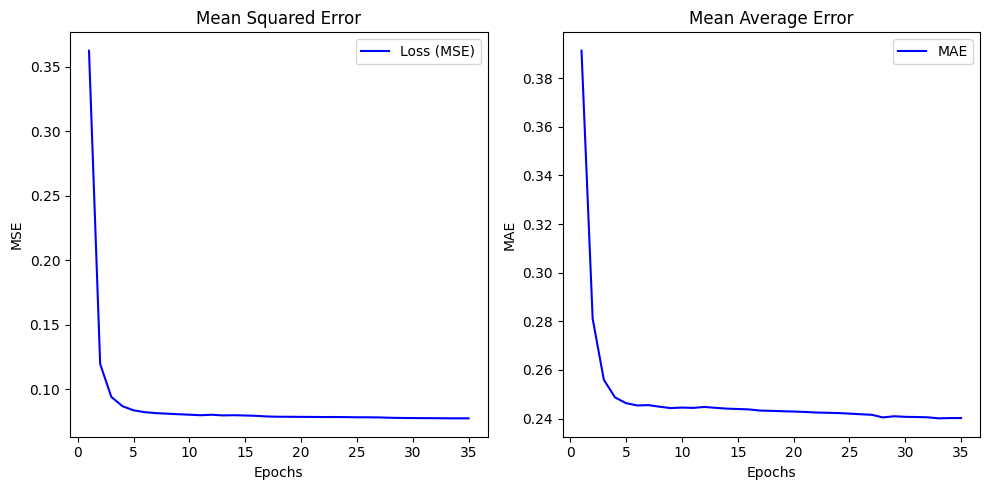

In [14]:
import matplotlib.pyplot as plt
# Extracting metrics from history
mse = history.history['loss']
mae = history.history['mae']

# Plotting
epochs = range(1, len(mse) + 1)
plt.figure(figsize=(10, 5))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(epochs, mse, 'b', label='Loss (MSE)')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MSE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b', label='MAE')
plt.title('Mean Average Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
df_test.head(3)

,Seconds of Day,Percentage Loss,Irradiance Level
0,0.340415,0.199050,0.297520
1,0.952372,0.719683,0.125759
2,0.802329,0.396875,0.284165


In [16]:
test_ds

<_ZipDataset element_spec=((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [17]:
# Initialize an empty list to store values from the specific column
y_test = []

# Iterate over the dataset and collect values from the specific column
for _, label_batch in test_ds:
    # You can access the values and append them to the list
    y_test.extend(label_batch.numpy().tolist())  # Assuming the tensor values are numeric

# Print all the collected values from the specific column
print(y_test)

[[0.19905008375644684], [0.7196834683418274], [0.39687514305114746], [0.4662178158760071], [0.1645469069480896], [0.7316280603408813], [0.08269376307725906], [0.005819190759211779], [0.041737060993909836], [0.14477519690990448], [0.8505403399467468], [0.032624442130327225], [0.06769832968711853], [0.051547374576330185], [0.6648725867271423], [0.62892085313797], [0.08953069150447845], [0.01715591549873352], [0.0156725887209177], [0.08922919631004333], [0.013192650862038136], [0.08123812824487686], [0.8087913990020752], [0.16183693706989288], [0.3326430022716522], [0.10974735766649246], [0.6624370813369751], [0.9632077813148499], [0.2502811551094055], [0.0052125100046396255], [0.1063043624162674], [0.03566984832286835], [0.07241427898406982], [0.1195966973900795], [0.2909330129623413], [0.08663368970155716], [0.6474552750587463], [0.07412264496088028], [0.6927054524421692], [0.5824285745620728], [0.19235727190971375], [0.013501862995326519], [0.9156534075737], [0.6623079180717468], [0.07

In [18]:
# Make predictions on new data
y_pred = model.predict(test_ds)

115/115 [==============================] - 55s 475ms/step


In [19]:
assert len(y_test) == len(y_pred)

In [20]:
from sklearn import metrics
import numpy as np

In [21]:
# evaluate predictions
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_score)

Mean Absolute Error: 0.2371594837000527
Mean Squared Error: 0.0769333454192602
Root Mean Squared Error: 0.2773686092896242
R-squared: 0.03438987722382025


Results 1:
Mean Absolute Error: 0.24973654225704806
Mean Squared Error: 0.08511214794397967
Root Mean Squared Error: 0.2917398634811151
R-squared: -0.007319673255404835

Results 2: (25% data total, 170m runtime, 35 epochs, 12 patience)
Mean Absolute Error: 0.2371594837000527
Mean Squared Error: 0.0769333454192602
Root Mean Squared Error: 0.2773686092896242
R-squared: 0.03438987722382025